#Paso 1: Importación de bibliotecas y carga de datos


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from scipy.cluster.hierarchy import dendrogram, linkage

# Cargar los datos
data = pd.read_csv("C:Downloads/Mall_Customers.csv") 
data.head(50)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


#Paso 2: Análisis Exploratorio de Datos (EDA)


#Resumen de datos:

In [34]:
data.info()  # Revisar los tipos de datos y valores faltantes
data.describe()  # Estadísticas generales


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


#Visualización de relaciones y distribución de variables:

#Distribución de variables como ingresos y puntaje de gasto según género:

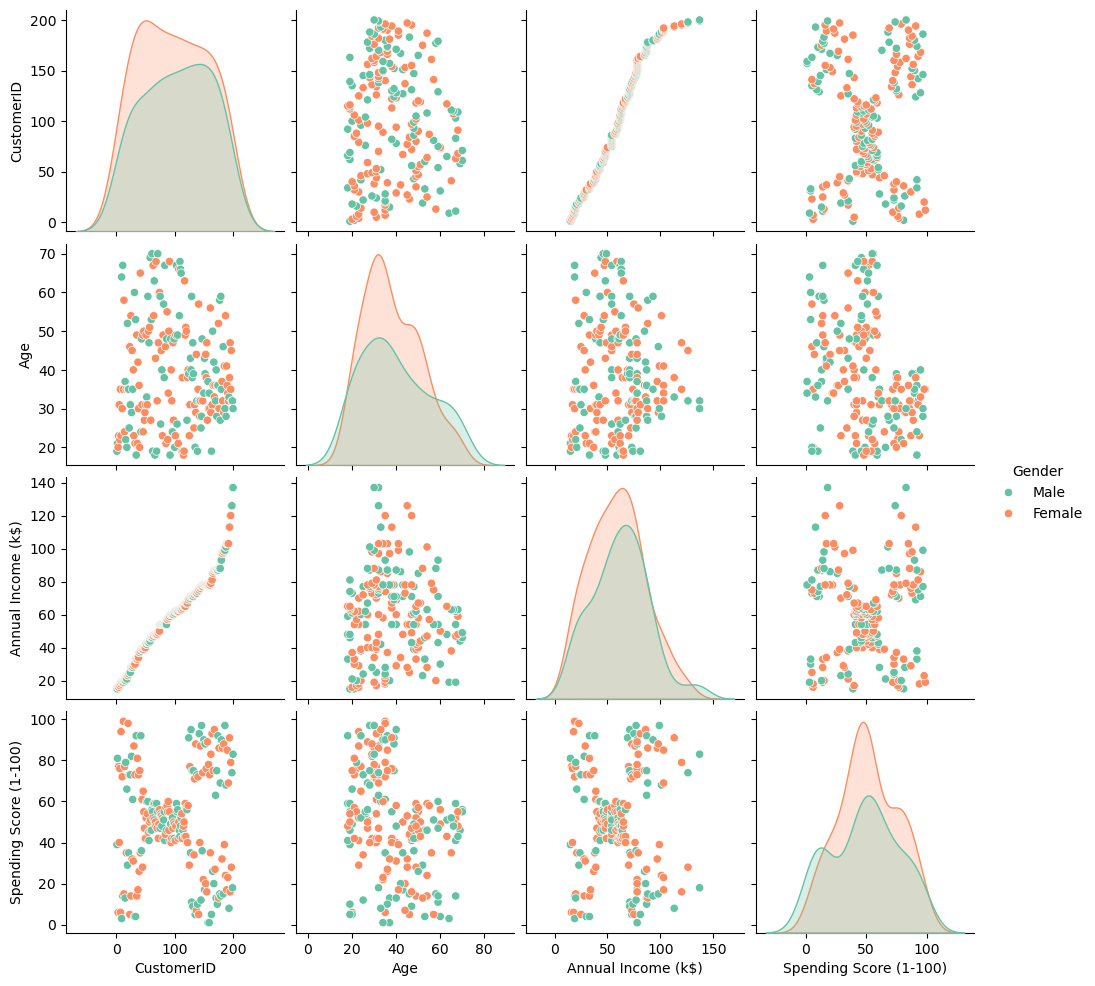

In [40]:
sns.pairplot(data, hue="Gender", palette="Set2")
plt.show()


#Histograma para ingresos anuales y puntaje de gasto:

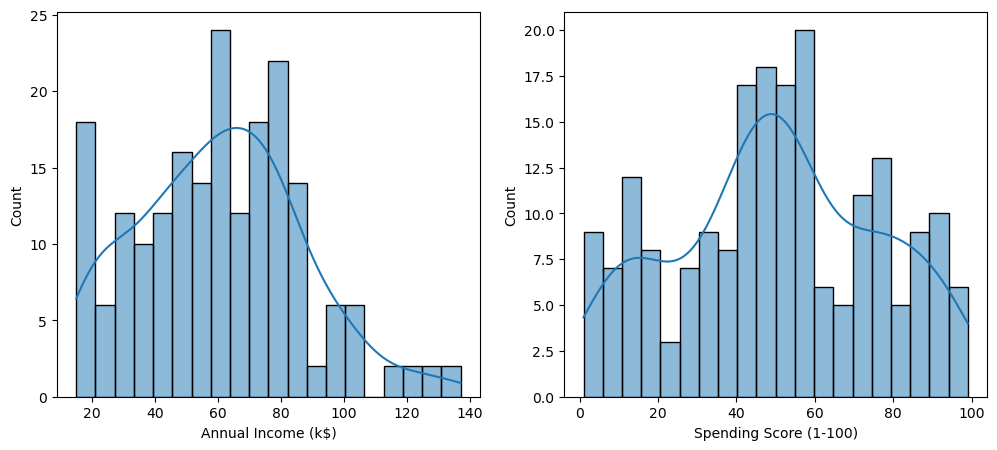

In [44]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(data['Annual Income (k$)'], bins=20, kde=True, ax=axes[0])
sns.histplot(data['Spending Score (1-100)'], bins=20, kde=True, ax=axes[1])
plt.show()


#Identificación de valores atípicos:

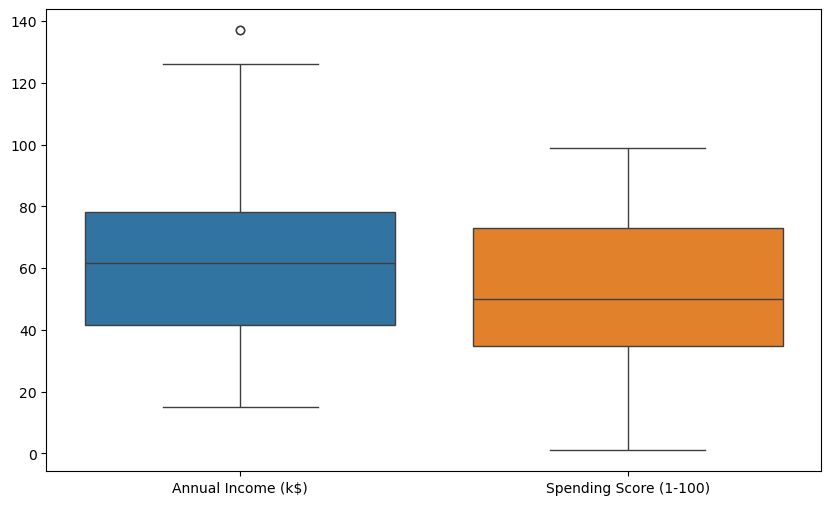

In [47]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['Annual Income (k$)', 'Spending Score (1-100)']])
plt.show()


#Paso 3: Preprocesamiento de Datos

#Tratar valores faltantes (si existen):

In [51]:
data.isnull().sum()  # Verificar valores nulos
# Imputar o eliminar según el caso
data = data.dropna()


In [53]:
#Codificación de variables categóricas:

In [55]:
data['Gender'] = data['Gender'].map({'Male': 1, 'Female': 0})


#Escalado de características:

In [58]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[['Annual Income (k$)', 'Spending Score (1-100)']])


#Paso 4: Selección de Características

In [64]:
# Seleccionar solo las características relevantes
data_selected = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# Escalado de las características seleccionadas
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_selected)

# Convertir el resultado escalado de nuevo a un DataFrame para facilitar la lectura
data_scaled = pd.DataFrame(data_scaled, columns=['Annual Income (k$)', 'Spending Score (1-100)'])

# Mostrar las primeras filas del dataset escalado
data_scaled.head(20)


,Annual Income (k$),Spending Score (1-100)
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980
5,-1.662660,1.001596
6,-1.624491,-1.715913
7,-1.624491,1.700384
8,-1.586321,-1.832378
9,-1.586321,0.846310


#Paso 5: Clustering con K-means

#Encontrar el número óptimo de clusters utilizando el método del codo y el coeficiente de silhouette:

C:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

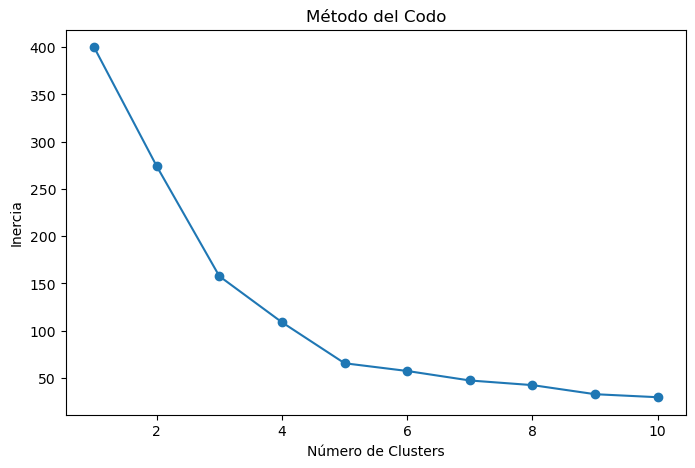

In [67]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.title('Método del Codo')
plt.show()


#Coeficiente de Silhouette:



C:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

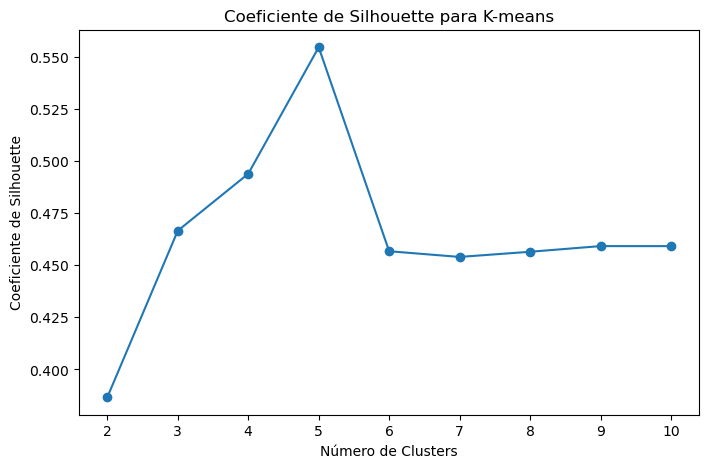

In [70]:
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(data_scaled)
    score = silhouette_score(data_scaled, kmeans.labels_)
    silhouette_scores.append(score)

plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Coeficiente de Silhouette')
plt.title('Coeficiente de Silhouette para K-means')
plt.show()


#Entrenar modelo K-means:

In [81]:
optimal_k = 5  # Ajusta según los resultados de los métodos
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
data['KMeans_Cluster'] = kmeans.fit_predict(data_scaled)


C:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


#Evaluación del Modelo K-means:

In [84]:
silhouette_kmeans = silhouette_score(data_scaled, data['KMeans_Cluster'])
calinski_kmeans = calinski_harabasz_score(data_scaled, data['KMeans_Cluster'])
print(f"Coeficiente de Silhouette (K-means): {silhouette_kmeans}")
print(f"Índice de Calinski-Harabasz (K-means): {calinski_kmeans}")


Coeficiente de Silhouette (K-means): 0.5546571631111091
Índice de Calinski-Harabasz (K-means): 248.64932001536357


#Paso 6: Clustering Jerárquico

#Dendrograma para decidir el número de clusters:

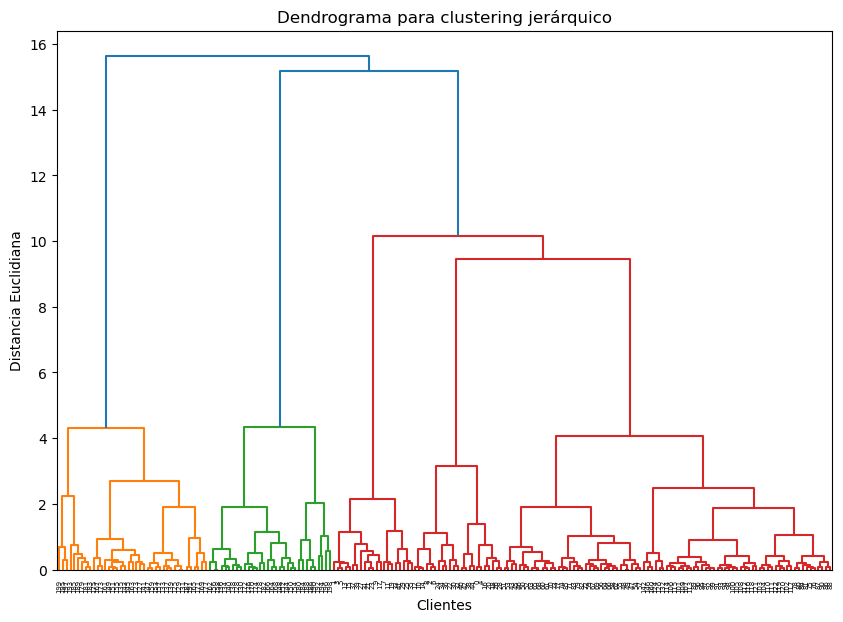

In [89]:
plt.figure(figsize=(10, 7))
dendrogram(linkage(data_scaled, method='ward'))
plt.title("Dendrograma para clustering jerárquico")
plt.xlabel("Clientes")
plt.ylabel("Distancia Euclidiana")
plt.show()


#Entrenar el modelo de clustering jerárquico:

In [108]:
from sklearn.cluster import AgglomerativeClustering

# Inicializar el modelo de clustering jerárquico
hierarchical = AgglomerativeClustering(n_clusters=optimal_k, linkage='ward')

# Ajustar y predecir los clusters
data['Hierarchical_Cluster'] = hierarchical.fit_predict(data_scaled)



#Evaluación del Modelo Jerárquico:

In [111]:
silhouette_hierarchical = silhouette_score(data_scaled, data['Hierarchical_Cluster'])
calinski_hierarchical = calinski_harabasz_score(data_scaled, data['Hierarchical_Cluster'])
print(f"Coeficiente de Silhouette (Clustering Jerárquico): {silhouette_hierarchical}")
print(f"Índice de Calinski-Harabasz (Clustering Jerárquico): {calinski_hierarchical}")


Coeficiente de Silhouette (Clustering Jerárquico): 0.5538089226688662
Índice de Calinski-Harabasz (Clustering Jerárquico): 244.41032586596822


#Paso 7: Visualización de Resultados

#Visualización de clusters para K-means:

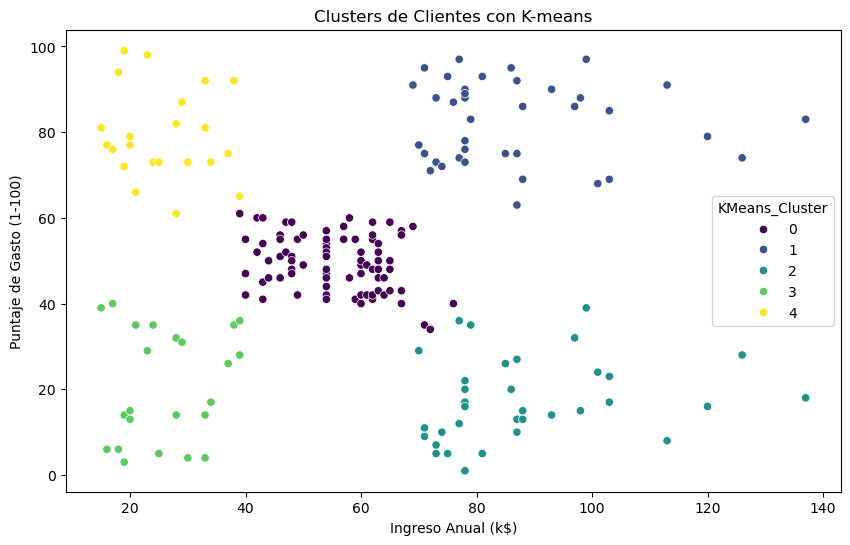

In [115]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Annual Income (k$)'], y=data['Spending Score (1-100)'],
                hue=data['KMeans_Cluster'], palette='viridis')
plt.title('Clusters de Clientes con K-means')
plt.xlabel('Ingreso Anual (k$)')
plt.ylabel('Puntaje de Gasto (1-100)')
plt.show()


#Visualización de clusters para Clustering Jerárquico:

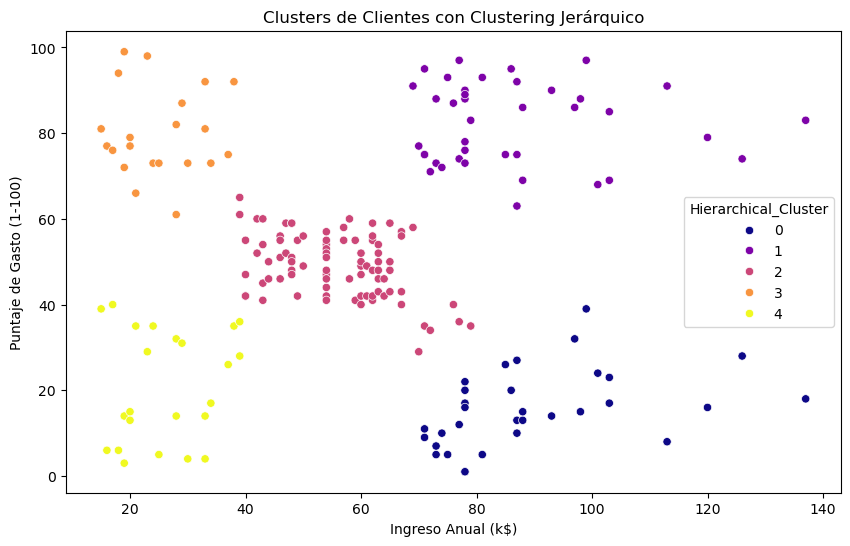

In [118]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Annual Income (k$)'], y=data['Spending Score (1-100)'],
                hue=data['Hierarchical_Cluster'], palette='plasma')
plt.title('Clusters de Clientes con Clustering Jerárquico')
plt.xlabel('Ingreso Anual (k$)')
plt.ylabel('Puntaje de Gasto (1-100)')
plt.show()


#Paso 8: Interpretación y Documentación de Resultados

# Analisis y Interpretacion de los resultados obtenido 

# 1 Resultados del clustering k-means

Numero de optimo de cluster: Utilizando el metodo del codo, identificando el valor de K(numero de clusters) que minimiza la suma de las distancias cuadradas entre cada punto y su centroide correspondiente, y notaste una disminucion significativa en el error hasta cierto valor de k, Este valor de K es el optimo para formar los cluster

## Visualizacion de clusters
- En el grafico de dipersion, los datos se agrupan visualmente alrededor de diferentes centroides
- cada color representa un cluster y muestra como los puntos se organizan alrededor de los centroides
- las distancias entre los cluster indica que tan distintos son entre si: cluster mas separados sugieren diferencias mayores, mientras que cluster mas cercanos indican similitudes

## Interpretacion de los centroides
- Los centroides de cada cluster representan las caracteristica promedio de los puntos en cada grupo
- los valores de cada variable en los centroides brindan una idea sobre las caracteristica comunes de cada cluster

# 2 Resultado del clutering jerarquico (Hierarchical clustering)
- Estructura de agrupamiento jerarquico:
- El dendrograma generado muestra como los datos se agrupan en diferentes niveles jerarquicos
- Al observar el dendrograma, seleccionaste un punto de corte adecuado para dividr los datos en un numero razonable de cluster, similar o igual al de k-means
  

## Patrones observados en el dendrograma

El dendrograma permite indentificar subgrupos dentro de los cluster mayores, lo que proporciona una vision mas detallada de las relaciones entre puntos

-Este metodo es util para ver como los datos se pueden agrupar de manera mas flexible, especialmente si no existe una estructura tan definida como en k-mean



## Relacion entre clusters
- la estructura jerarquica proporciona una comparacion de las similtudes entre los cluster, donde los clusters que se unen a niveles superiores son mas diferentres entre si
- Este analisis sugiere como varian los datos de cada cluster y como estan relacionados entre si en terminos de similitud

# Comparacion y Concluciones Generales
## Consistencia entre metodos
- Observamos que ambos metodos, en general, identificaron grupos similares, lo cual valida la coherencia del analisis
- Sin embargo, notamos alguna diferencias en la forma  y distribucion de los clusters debido a las distintas metodologias de agrupacion de k-means y Clustering jerarquico

## Interpretacion global
- Los clusters obtenidos proporcionan una segmentacion clara de los datos en grupos distintos, lo que puede ser util para analisis adicionales o para tomar decisiones basadas en estas segmentaciones
- La estructura jerarquica brinda una capa adicional de analisis sobre las similitudes y diferencias, mientras que k-means proporciona una agrupacion mas simple y rapida